In [1]:
import sys
sys.path.append('./.venv/lib/python3.7/site-packages/')
sys.path.append('./tomcat_model/')
%load_ext autoreload
%autoreload 2

[0.68627451 0.31372549]
[0.99 0.01]
[0.06160164 0.32854209 0.60985626]
[0.95 0.05]
[0.25725338 0.74274662]
[0.1 0.9]
[9.43835936e-01 5.59310184e-02 2.33045910e-04]
[0.2 0.8]
[8.01103475e-04 9.99198897e-01]
[0.1 0.9]
[9.61992710e-01 3.80046503e-02 2.63921183e-06]
[0.2 0.8]
[1.56695292e-04 9.99843305e-01]
[0.1 0.9]
[9.74338383e-01 2.56615870e-02 2.97009109e-08]
[0.2 0.8]
[4.47873169e-07 9.99999552e-01]
[0.1 0.9]
[9.82744675e-01 1.72553249e-02 3.32857347e-10]
[0.2 0.8]
[1.42214528e-09 9.99999999e-01]
[0.1 0.9]
[9.88429901e-01 1.15700985e-02 3.71981048e-12]
[0.2 0.8]
[5.01753234e-12 1.00000000e+00]
[0.1 0.9]
[9.55272124e-01 4.47278763e-02 3.55907580e-11]
[0.2 0.8]
[1.34539555e-11 1.00000000e+00]
[0.1 0.9]
[9.69730113e-01 3.02698868e-02 4.01438024e-13]
[0.2 0.8]
[5.27416478e-13 1.00000000e+00]
[0.1 0.9]
[8.89000298e-01 1.10999702e-01 3.64338214e-12]
[0.2 0.8]
[2.06755657e-13 1.00000000e+00]
[0.1 0.9]
[9.23157016e-01 7.68429840e-02 4.20374036e-14]
[0.2 0.8]
[9.00572325e-14 1.00000000e+00]
[0

/Users/paulosoares/Desktop/Repo/TOMCAT/server/model/sampling/gibbs_sampling.py:78: RuntimeWarning: invalid value encountered in true_divide
  return Multinomial(posterior/np.sum(posterior))


ValueError: probabilities contain NaN

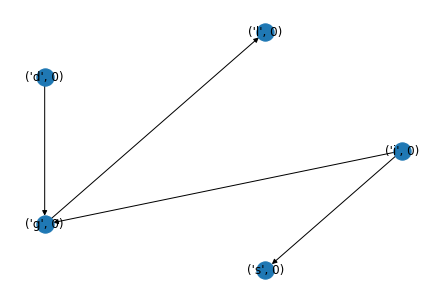

In [4]:
import numpy as np
from base.node import Node
from base.edge import Edge
from distribution.cpd import CPD
from distribution.discrete.multinomial import Multinomial
from model.pgm_metadata import PGMMetadata
from model.pgm import PGM
from sampling.ancestral_sampling import AncestralSampling
from sampling.gibbs_sampling import GibbsSampling
import networkx as nx

np.random.seed(42)

d = Node('d', cardinality = 2, state_names={0: 'easy', 1:'hard'})
i = Node('i', cardinality = 2, state_names={0: 'dumb', 1:'smart'})
g = Node('g', cardinality = 3, state_names={0: 'A', 1:'B', 2:'C'})
s = Node('s', cardinality = 2, state_names={0: 'Low', 1:'High'})
l = Node('l', cardinality = 2, state_names={0: 'Bad', 1:'Good'})
nodes = [d, i, g, s, l]

e1 = Edge(d, g)
e2 = Edge(i, g)
e3 = Edge(g, l)
e4 = Edge(i, s)
edges = [e1, e2, e3, e4]

d_prior = CPD(d, [], Multinomial([0.6, 0.4]))
i_prior = CPD(i, [], Multinomial([0.7, 0.3]))
g_given_d_i = CPD(g, [i, d], [Multinomial([0.3, 0.4, 0.3]), Multinomial([0.05, 0.25, 0.7]), 
                              Multinomial([0.9, 0.08, 0.02]), Multinomial([0.5, 0.3, 0.2])])
l_given_g = CPD(l, [g], [Multinomial([0.1, 0.9]), Multinomial([0.4, 0.6]), Multinomial([0.99, 0.01])])
s_given_i = CPD(s, [i], [Multinomial([0.95, 0.05]), Multinomial([0.2, 0.8])])
cpds = [d_prior, i_prior, g_given_d_i, l_given_g, s_given_i]

metadata = PGMMetadata()
metadata.add_nodes_from(nodes)
metadata.add_edges_from(edges)
metadata.add_cpds_from(cpds)

pgm = PGM(metadata, 1)
nx.draw_shell(pgm, with_labels=True)

# sampling = AncestralSampling(pgm)
# sample = sampling.sample(5, observations={('d', 0):0})
# print(sample)    

sampling = GibbsSampling(pgm, 100)
sample = sampling.sample(10, observations={('d', 0):0})
print(sample)    